<a href="https://colab.research.google.com/github/Catia2021/Projeto6_Machine_learning_Medicamentos/blob/main/Projeto_Machine_Learning_Medicamentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tema do Projeto:Uso de Medicamentos

#Apresentação dos Dados

Neste estudo serão utilizados dados coletados do repositório Kaggle disponibilizados no seguinte link: (https://www.kaggle.com/ibrahimbahbah/drug200

Com base neste dataset, será feito um modelo preditivo para a possibilidade de ter ou não diabetes tipo 2.


#Problema a ser resolvido

1-Classificar os pacientes  para usar o medicamento corretamente

2-Verificar  qual algoritmo (Naive Bayes /Random Forest) é mais eficiente para obter resposta correta


#Objetivos do Projeto

Instalar e importar bibliotecas apropriadas

Pré-processar os dados

Estabelecer as Variáveis Preditoras e de Classe

Realizar tratamento de atributos categóricos usando o LabelEncoder 
Tratar os dados desbalanceados s/n usando Tomek Links

Escalonar os Atributos

Dividir a base de dados em Treinamento e Teste

Treinar o algoritmo Naive Baiyes  e Random Forest

Testar o algoritmo utilizando a matriz de confusão, a função accuracy_score e a classification_report

#Importando Bibliotecas e Dados

In [ ]:
! pip install pyod

In [ ]:
!pip  install plotly --upgrade

In [4]:
import pandas as pd  # biblioteca para manipulação de dados
import numpy as np # biblioteca para manipulação de  dados numéricos
import seaborn as sns # biblioteca para otimizar gráficos
import matplotlib.pyplot as plt # biblioteca para geração de gráficos
import plotly.express as px  # biblioteca para geração de gráficos interativos
import sklearn # bilioteca para subsidiar Machine Learning
import plotly.graph_objects as go # para concatenar graficos
from sklearn.preprocessing import StandardScaler #para escalonar variaveis
from sklearn.naive_bayes import GaussianNB #  para  usar o Naive Bayes
from sklearn.preprocessing import LabelEncoder #para transformar  variaveis
from sklearn.preprocessing import StandardScaler #para escalonar variaveis
from sklearn.compose import ColumnTransformer #para transformar variaveis
from sklearn.model_selection import train_test_split  #para dividir base de teste e treinamento
from sklearn.metrics import accuracy_score #para avaliar a acurácia
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from yellowbrick.classifier import ConfusionMatrix
from numpy.ma.core import filled
from IPython.core.pylabtools import figsize
from pyod. models.knn import KNN
from imblearn.under_sampling import TomekLinks
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import files
uploaded = files.upload()

#Pré-Processamento dos Dados

In [6]:
Medicamento = pd.read_csv ('/content/drug200.csv')

In [7]:
print( ' Este dataset tem %s linhas e %s colunas' % (Medicamento.shape[0] , Medicamento.shape[1] ) )
Medicamento.head(10)

 Este dataset tem 200 linhas e 6 colunas


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


In [8]:
Medicamento.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


**Acima você pode conferir as primeiras e últimas linhas do dataset e o total de linhas e colunas. Como os dados podem causar certa confusão, será alterado o idioma dos cabeçalhos das colunas.**

In [9]:
Medicamento.columns = ['Idade','Sexo',' Pressao_Arterial','Colesterol','Razao_Sodio_Potassio_sangue','Medicamentos']

In [10]:
Medicamento.head()

,Idade,Sexo,Pressao_Arterial,Colesterol,Razao_Sodio_Potassio_sangue,Medicamentos
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


**Continuando a tratamento dos dados, serão renomeados os registros das colunas Pressao_Arterial, Colesterol e Medicamentos para melhor compreensão. Antes de renomear, será necessário, verificar os registros que serão alterados. Para isto , usaremos a função unique.**

In [11]:
np.unique (Medicamento[' Pressao_Arterial'])

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [12]:
np.unique (Medicamento['Colesterol'])

array(['HIGH', 'NORMAL'], dtype=object)

In [13]:
np.unique (Medicamento['Medicamentos'])

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)

In [14]:
Medicamento[' Pressao_Arterial']= Medicamento [' Pressao_Arterial']. replace ( ['HIGH','LOW','NORMAL'], ['Alta','Baixa', 'Normal'])

In [15]:
Medicamento['Colesterol']= Medicamento ['Colesterol']. replace ( ['HIGH','NORMAL'], ['Alto', 'Normal'])

In [16]:
Medicamento['Medicamentos']= Medicamento ['Medicamentos']. replace ( ['DrugY','drugA','drugB','drugC','drugX'], ['DrogaY','DrogaA', 'DrogaB','DrogaC','DrogaX'])

In [17]:
Medicamento.head()

,Idade,Sexo,Pressao_Arterial,Colesterol,Razao_Sodio_Potassio_sangue,Medicamentos
0,23,F,Alta,Alto,25.355,DrogaY
1,47,M,Baixa,Alto,13.093,DrogaC
2,47,M,Baixa,Alto,10.114,DrogaC
3,28,F,Normal,Alto,7.798,DrogaX
4,61,F,Baixa,Alto,18.043,DrogaY


In [18]:
Medicamento.tail()

,Idade,Sexo,Pressao_Arterial,Colesterol,Razao_Sodio_Potassio_sangue,Medicamentos
195,56,F,Baixa,Alto,11.567,DrogaC
196,16,M,Baixa,Alto,12.006,DrogaC
197,52,M,Normal,Alto,9.894,DrogaX
198,23,M,Normal,Normal,14.020,DrogaX
199,40,F,Baixa,Normal,11.349,DrogaX


**Vejamos um Resumo do Dataset.**

In [19]:
Medicamento.describe()

,Idade,Razao_Sodio_Potassio_sangue
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


**Como se observa a idade média é de 44 anos, sendo a idade mínima 15 e a máxima 74. A razão sódio potássio, assim como a  idade,  apresenta dados desbalanceados.**

**Após este processamento inicial será caracterizado os tipos de variáveis e seus significados.**

In [20]:
Medicamento.dtypes

Idade                            int64
Sexo                            object
 Pressao_Arterial               object
Colesterol                      object
Razao_Sodio_Potassio_sangue    float64
Medicamentos                    object
dtype: object

**Se tem 2 variáveis Numéricas e 4 Categóricas, assim classificadas:**

Idade : Numérica Discreta

Razao_Sodio_Potassio_sangue: Numérica Contínua

Pressao_Arterial, Colesterol : Categórica Ordinal

Medicamentos: Categórica Nominal


**Dicionário de Dados**

    
*   Idade: Idade da pessoa
*  Razao_Sodio_Potassio_sangue: Razão entre sódio e potássio
*   Colesterol: valores em mg/dL, classificado em alto ou normal
*   Pressão Aterial:classificada em alta,normal e baixa
*   Sexo: Sexo

*  Medicamentos: 5 tipos de medicamentos usados 










**Prosseguindo o processamento de dados, será analisado se há valores faltantes e inconsistentes**


In [21]:
Medicamento.isnull()

,Idade,Sexo,Pressao_Arterial,Colesterol,Razao_Sodio_Potassio_sangue,Medicamentos
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
195,False,False,False,False,False,False
196,False,False,False,False,False,False
197,False,False,False,False,False,False
198,False,False,False,False,False,False


In [27]:
Medicamento.isnull().sum()

Idade                          0
Sexo                           0
 Pressao_Arterial              0
Colesterol                     0
Razao_Sodio_Potassio_sangue    0
Medicamentos                   0
dtype: int64

In [22]:
Medicamento.loc[Medicamento['Idade']<=0]

,Idade,Sexo,Pressao_Arterial,Colesterol,Razao_Sodio_Potassio_sangue,Medicamentos


In [23]:
Medicamento.loc [Medicamento['Razao_Sodio_Potassio_sangue']<=0]

,Idade,Sexo,Pressao_Arterial,Colesterol,Razao_Sodio_Potassio_sangue,Medicamentos


In [24]:
np.unique(Medicamento['Medicamentos'],return_counts=True)

(array(['DrogaA', 'DrogaB', 'DrogaC', 'DrogaX', 'DrogaY'], dtype=object),
 array([23, 16, 16, 54, 91]))

**Não foram observados valores inconsistentes nem faltantes  no dataset, porém há dados desbalanceados na variável target. Agora, serão feitas as Visualizações gráficas, que ajudam a identificar,também, existência de valores inconsistentes**

#Visualizando Gráficos

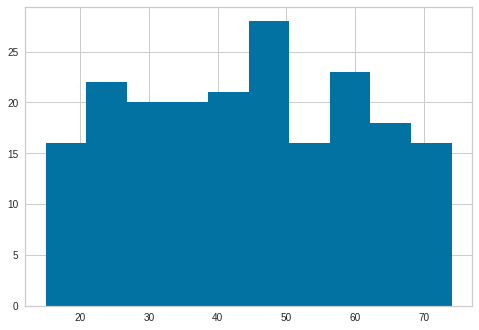

In [25]:
Medicamento["Idade"].hist()

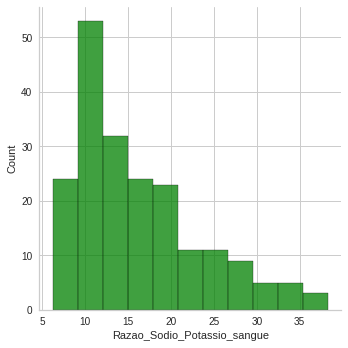

In [26]:
sns.displot(Medicamento['Razao_Sodio_Potassio_sangue'],color='green')

In [28]:
Grafico = Medicamento['Medicamentos'].value_counts()

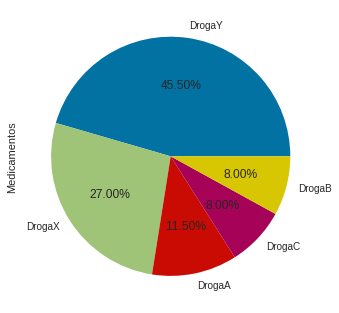

In [29]:
Grafico.plot(kind='pie', autopct='%1.2f%%')

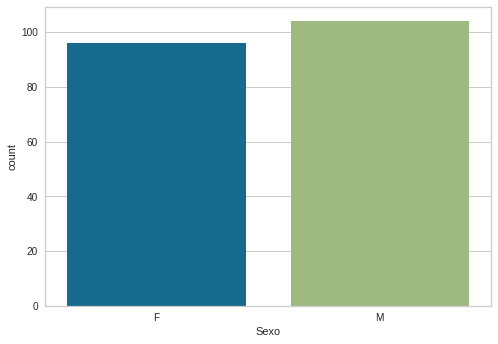

In [30]:
sns.countplot(x=Medicamento['Sexo'])

In [31]:
Grafico1 = Medicamento['Colesterol'].value_counts()

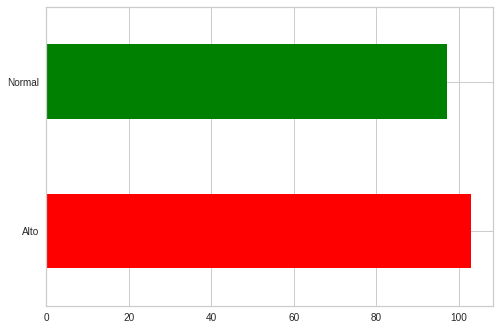

In [32]:
Grafico1.plot(kind ='barh',color=['red','green'])

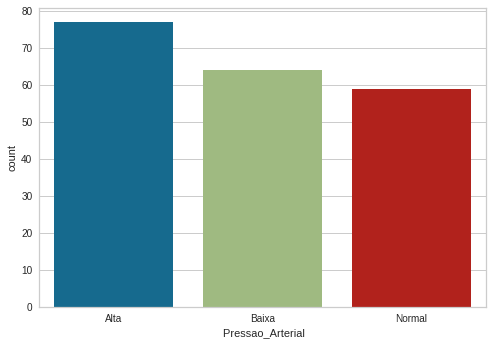

In [33]:
sns.countplot(x=Medicamento[' Pressao_Arterial']);

**De acordo com as  visualizações acima, percebe-se que a maior frequência das idades  está entre 45 e 50 anos, a razão sódio/potásio entre 10 e 15, a maior quantidade de medicamento é da droga Y seguida da X, a quantidade  de homens e mulheres  tem pouca diferença, assim como os valores de colesterol  e os  valores  de pressão alta  se destaca pouco das baixas e normal.**


**Não foram visualizados  valores inconsistentes.**

**Verificando se há Outliers.**

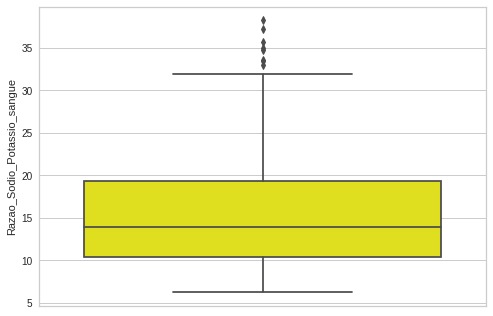

In [34]:
sns.boxplot(y= 'Razao_Sodio_Potassio_sangue',data= Medicamento,color='yellow');

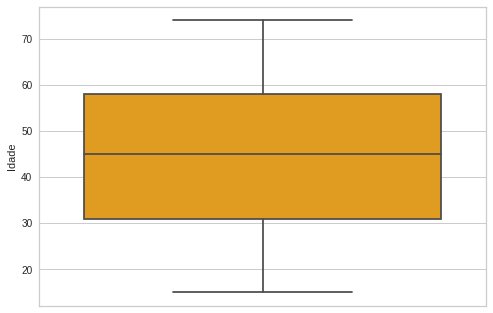

In [35]:
sns.boxplot(y= 'Idade',data= Medicamento,color='orange');

In [36]:
grafico= px.scatter(x=Medicamento['Razao_Sodio_Potassio_sangue'], y=Medicamento['Idade'])
grafico.show()

**O  que se percebe  é  que  os  registros estão dispersos  e  que há  uma correlação entre razão sódio/potássio e idade. Será feito então uma análise utilizando a biblioteca pyod. **

In [37]:
detector = KNN()
detector.fit(Medicamento.iloc[:,[0,4]])

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [38]:
previsores = detector.labels_
previsores

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0])

In [39]:
np.unique( previsores,return_counts=True)

(array([0, 1]), array([180,  20]))

**Foram detectados 20 outliers. O número 0 representa a não presença de outliers e o 1 a presença.Porém pela análise gráfica, fica difícil dizer  se  estes outliers são significativos.**

**Verificando a confiabilidade dos previsores.**

In [ ]:
confianca_previsoes = detector.decision_scores_
confianca_previsoes

In [41]:
outliers =[]
for i in range(len(previsores)):
   if previsores[i]== 1:
     outliers.append(i)

In [42]:
print(outliers)

[19, 22, 24, 26, 33, 48, 60, 65, 69, 92, 93, 96, 98, 128, 131, 164, 168, 184, 188, 194]


**Estes são os indices que se encontram os outliers.**

#Preparando o banco de dados para análise dos algoritmos


#Dividindo as Variáveis Preditoras e de Classe

***Serão criadas duas variáveis: a X será a variável preditora e a Y a de classe ***

In [43]:
X_Medicamento = Medicamento.iloc[:,0:5].values

In [ ]:
X_Medicamento

In [45]:
type(X_Medicamento)

numpy.ndarray

In [46]:
type(Medicamento)

pandas.core.frame.DataFrame

In [47]:
Y_Medicamento = Medicamento.iloc[:,5].values

In [ ]:
Y_Medicamento

#Tratando atributos Categóricos com Label Encoder

In [49]:
label_encoder_Sexo = LabelEncoder()
label_encoder_Pressao_Arterial = LabelEncoder()
label_encoder_Colesterol = LabelEncoder()

In [50]:
X_Medicamento[:,1]=label_encoder_Sexo.fit_transform(X_Medicamento[:,1])
X_Medicamento[:,2]=label_encoder_Pressao_Arterial.fit_transform(X_Medicamento[:,2])
X_Medicamento[:,3]=label_encoder_Colesterol.fit_transform(X_Medicamento[:,3])

In [ ]:
X_Medicamento

#Tratando os Dados Desbalanceados com Tomek Links

In [52]:
np.unique(Medicamento['Medicamentos'],return_counts=True)

(array(['DrogaA', 'DrogaB', 'DrogaC', 'DrogaX', 'DrogaY'], dtype=object),
 array([23, 16, 16, 54, 91]))

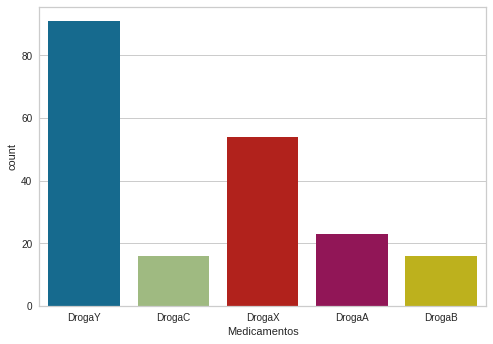

In [53]:
sns.countplot(x=Medicamento['Medicamentos'])

In [54]:
from imblearn.under_sampling import TomekLinks

In [55]:
tl= TomekLinks(sampling_strategy='majority')

In [56]:
X_under, Y_under = tl.fit_resample(X_Medicamento,Y_Medicamento)

In [57]:
X_under.shape,Y_under.shape

((195, 5), (195,))

In [58]:
np.unique(Y_Medicamento,return_counts=True)

(array(['DrogaA', 'DrogaB', 'DrogaC', 'DrogaX', 'DrogaY'], dtype=object),
 array([23, 16, 16, 54, 91]))

In [59]:
np.unique(Y_under,return_counts=True)

(array(['DrogaA', 'DrogaB', 'DrogaC', 'DrogaX', 'DrogaY'], dtype=object),
 array([23, 16, 16, 54, 86]))

#Escalonando os Atributos

**Vamos verificar os valores existentes inicialmente**

In [60]:
X_under[:,0].min()

15.0

In [61]:
X_under[:,0].max()

74.0

In [62]:
X_under[:,4].min()

6.269

In [63]:
X_under[:,4].max()

38.247

In [64]:
X_under[:,4].min(),X_under[:,0].min()

(6.269, 15.0)

In [65]:
X_under[:,4].max(),X_under[:,0].max()

(38.247, 74.0)

**Como há muito discrepância  entre os  valores idade e razão sódio/potássio, vamos padronizar os valores.**

In [66]:
scaler_Medicamento = StandardScaler()
X_under = scaler_Medicamento.fit_transform(X_under)

In [ ]:
X_under

**Feito a Padronização, se procede à divisão das bases de dados em Treinamento e Teste.**

#Divisão Base de Treinamento e Teste

**Serão criados 4 variáveis , duas para treinamento e 2 para teste.**

In [68]:
X_under_treinamento, X_under_teste,Y_under_treinamento,Y_under_teste = train_test_split(X_under,Y_under, test_size=0.25,random_state=0)

**Verificando as variáveis criadas.**

In [69]:
X_under_treinamento.shape

(146, 5)

In [70]:
X_under_teste.shape

(49, 5)

In [71]:
Y_under_treinamento.shape

(146,)

In [72]:
Y_under_teste.shape

(49,)

In [73]:
X_under_teste.shape,Y_under_teste.shape

((49, 5), (49,))

#Treinando  e Testando  o Algoritmo *Naive Bayes*

In [74]:
naive_Tipo_Medicamento = GaussianNB()

In [75]:
naive_Tipo_Medicamento.fit(X_under_treinamento, Y_under_treinamento)

GaussianNB()

**  Testando o Algoritmo  com  os  grupos X  e Y teste**

In [76]:
previsao = naive_Tipo_Medicamento.predict(X_under_teste)
previsao

array(['DrogaB', 'DrogaX', 'DrogaX', 'DrogaX', 'DrogaB', 'DrogaA',
       'DrogaX', 'DrogaY', 'DrogaA', 'DrogaY', 'DrogaC', 'DrogaX',
       'DrogaX', 'DrogaC', 'DrogaA', 'DrogaY', 'DrogaX', 'DrogaY',
       'DrogaA', 'DrogaX', 'DrogaX', 'DrogaY', 'DrogaA', 'DrogaY',
       'DrogaY', 'DrogaY', 'DrogaX', 'DrogaX', 'DrogaY', 'DrogaC',
       'DrogaY', 'DrogaX', 'DrogaY', 'DrogaX', 'DrogaC', 'DrogaC',
       'DrogaX', 'DrogaA', 'DrogaY', 'DrogaY', 'DrogaB', 'DrogaA',
       'DrogaY', 'DrogaY', 'DrogaX', 'DrogaY', 'DrogaB', 'DrogaX',
       'DrogaY'], dtype='<U6')

**Comparando com os dados reais  que  estão na  base Y_under_Teste**

In [77]:
Y_under_teste

array(['DrogaB', 'DrogaX', 'DrogaX', 'DrogaX', 'DrogaY', 'DrogaB',
       'DrogaX', 'DrogaY', 'DrogaA', 'DrogaY', 'DrogaC', 'DrogaX',
       'DrogaX', 'DrogaY', 'DrogaA', 'DrogaY', 'DrogaX', 'DrogaY',
       'DrogaA', 'DrogaX', 'DrogaX', 'DrogaY', 'DrogaA', 'DrogaY',
       'DrogaY', 'DrogaY', 'DrogaX', 'DrogaX', 'DrogaY', 'DrogaC',
       'DrogaY', 'DrogaX', 'DrogaY', 'DrogaX', 'DrogaY', 'DrogaC',
       'DrogaX', 'DrogaA', 'DrogaY', 'DrogaY', 'DrogaY', 'DrogaA',
       'DrogaY', 'DrogaY', 'DrogaX', 'DrogaY', 'DrogaY', 'DrogaX',
       'DrogaY'], dtype=object)

#Métricas de Avaliação  do Algoritmo Naive Bayes

 **Matriz de Confusão**

In [78]:
confusion_matrix(Y_under_teste,previsao)

array([[ 6,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0, 16,  0],
       [ 0,  3,  2,  0, 17]])

0.8775510204081632

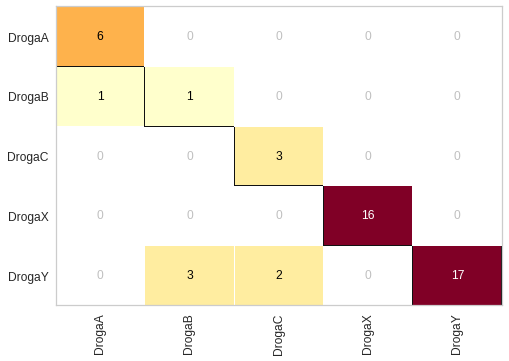

In [79]:
cm = ConfusionMatrix(naive_Tipo_Medicamento)
cm.fit(X_under_treinamento, Y_under_treinamento)
cm.score(X_under_teste,Y_under_teste)

**Avaliando a Acurácia**

In [80]:
accuracy_score (Y_under_teste,previsao)

0.8775510204081632

**Avaliando Precisão e Sensibilidade**

In [81]:
print (classification_report(Y_under_teste,previsao))

              precision    recall  f1-score   support

      DrogaA       0.86      1.00      0.92         6
      DrogaB       0.25      0.50      0.33         2
      DrogaC       0.60      1.00      0.75         3
      DrogaX       1.00      1.00      1.00        16
      DrogaY       1.00      0.77      0.87        22

    accuracy                           0.88        49
   macro avg       0.74      0.85      0.78        49
weighted avg       0.93      0.88      0.89        49



**Para  as  drogas A, C e X  tem uma  ótima sensibilidade,porém a precisão  não fica  boa na droga C. O recall e precisão da droga B é muito fraco. E para a droga Y não tem boa  sensibilidade se  considerarmos  que  estamos lidando com uso de medicamentos para pacientess, porém tem ótima precisão.**

#Treinando e testando o algoritmo *Random Forest*

In [104]:
random_forest_Medicamento= RandomForestClassifier(n_estimators=10,criterion='entropy', random_state=0)
random_forest_Medicamento.fit(X_under_treinamento, Y_under_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [105]:
previsores= random_forest_Medicamento.predict(X_under_teste)
previsores

array(['DrogaB', 'DrogaX', 'DrogaX', 'DrogaX', 'DrogaY', 'DrogaA',
       'DrogaX', 'DrogaY', 'DrogaA', 'DrogaY', 'DrogaC', 'DrogaX',
       'DrogaX', 'DrogaY', 'DrogaA', 'DrogaY', 'DrogaX', 'DrogaY',
       'DrogaA', 'DrogaX', 'DrogaX', 'DrogaY', 'DrogaA', 'DrogaY',
       'DrogaY', 'DrogaY', 'DrogaX', 'DrogaX', 'DrogaY', 'DrogaC',
       'DrogaY', 'DrogaX', 'DrogaY', 'DrogaX', 'DrogaY', 'DrogaC',
       'DrogaX', 'DrogaA', 'DrogaY', 'DrogaY', 'DrogaY', 'DrogaA',
       'DrogaY', 'DrogaY', 'DrogaX', 'DrogaY', 'DrogaY', 'DrogaX',
       'DrogaY'], dtype=object)

In [106]:
Y_under_teste

array(['DrogaB', 'DrogaX', 'DrogaX', 'DrogaX', 'DrogaY', 'DrogaB',
       'DrogaX', 'DrogaY', 'DrogaA', 'DrogaY', 'DrogaC', 'DrogaX',
       'DrogaX', 'DrogaY', 'DrogaA', 'DrogaY', 'DrogaX', 'DrogaY',
       'DrogaA', 'DrogaX', 'DrogaX', 'DrogaY', 'DrogaA', 'DrogaY',
       'DrogaY', 'DrogaY', 'DrogaX', 'DrogaX', 'DrogaY', 'DrogaC',
       'DrogaY', 'DrogaX', 'DrogaY', 'DrogaX', 'DrogaY', 'DrogaC',
       'DrogaX', 'DrogaA', 'DrogaY', 'DrogaY', 'DrogaY', 'DrogaA',
       'DrogaY', 'DrogaY', 'DrogaX', 'DrogaY', 'DrogaY', 'DrogaX',
       'DrogaY'], dtype=object)

#Métricas de Avaliação do algoritmo Random Forest

**Matriz de Confusão**

In [107]:
confusion_matrix(Y_under_teste,previsores)

array([[ 6,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0, 16,  0],
       [ 0,  0,  0,  0, 22]])

0.9795918367346939

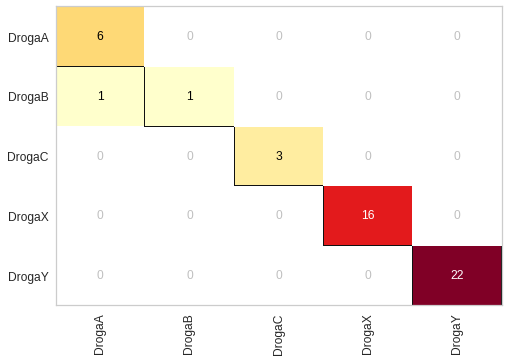

In [108]:
cm = ConfusionMatrix(random_forest_Medicamento)
cm.fit(X_under_treinamento, Y_under_treinamento)
cm.score(X_under_teste,Y_under_teste)

**Avaliando a Acurácia**

In [109]:
accuracy_score (Y_under_teste,previsores)

0.9795918367346939

**Avaliando Precisão e Sensibilidade**

In [110]:
print (classification_report(Y_under_teste,previsores))

              precision    recall  f1-score   support

      DrogaA       0.86      1.00      0.92         6
      DrogaB       1.00      0.50      0.67         2
      DrogaC       1.00      1.00      1.00         3
      DrogaX       1.00      1.00      1.00        16
      DrogaY       1.00      1.00      1.00        22

    accuracy                           0.98        49
   macro avg       0.97      0.90      0.92        49
weighted avg       0.98      0.98      0.98        49



**Para as drogas A, C, X  e Y tem uma ótima sensibilidade,porém é 100% preciso para as drogas X eY e 86% para a droga A. Com relação a droga B, o recall é fraco, porém  a precisão é muito boa.**

**Comparando as métricas do Naive Bayes e Random Forest , percebe-se  que o Random Forest  tem uma resposta muito  superior ao Naive Bayes em termos de acurácia, precisão e recall.**

# Conclusão

**O  Projeto conseguiu responder aos problemas postos  e apesar  do algoritmo Random Forest  não apresentar uma boa sensibilidade, é possível utilizá-lo  com as devidas  avaliações.**